# ----- Medical_Insurance Project -----


## ------ Content Columns 

<font size='2'>Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost

* **age:** age of primary beneficiary

* **sex:** insurance contractor gender, female, male

* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* **children:** Number of children covered by health insurance / Number of dependents

* **smoker:** Smoking

* **region:** the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

### --------- Import Helper Libraries ----------

In [70]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

### -------- Load Data -----------

In [71]:
df = pd.read_csv('insurance.csv')

### ----------- Data Inpection ---------

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### --- Size Data 

In [73]:
df.shape

(1338, 7)

### --- Change Column Name ---

In [74]:
df.columns = df.columns.str.lower()

### --- Information On Data_Set ---

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### ----------- Data Cleaning -----------

### --- Drop Null In Data

In [76]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### --- Drop Duplicated

In [77]:
df.duplicated().sum()

1

In [78]:
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

### ------ Describe Data ---------

In [80]:
df.describe(include = "number").round().T.style.background_gradient(cmap = 'GnBu')

,count,mean,std,min,25%,50%,75%,max
age,1337.000000,39.000000,14.000000,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1337.000000,31.000000,6.000000,16.000000,26.000000,30.000000,35.000000,53.000000
children,1337.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1337.000000,13279.000000,12110.000000,1122.000000,4746.000000,9386.000000,16658.000000,63770.000000


In [81]:
df.describe(include = "object").round().T.style.background_gradient(cmap = 'GnBu')

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [82]:
df.select_dtypes(include='number').corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<Axes: >

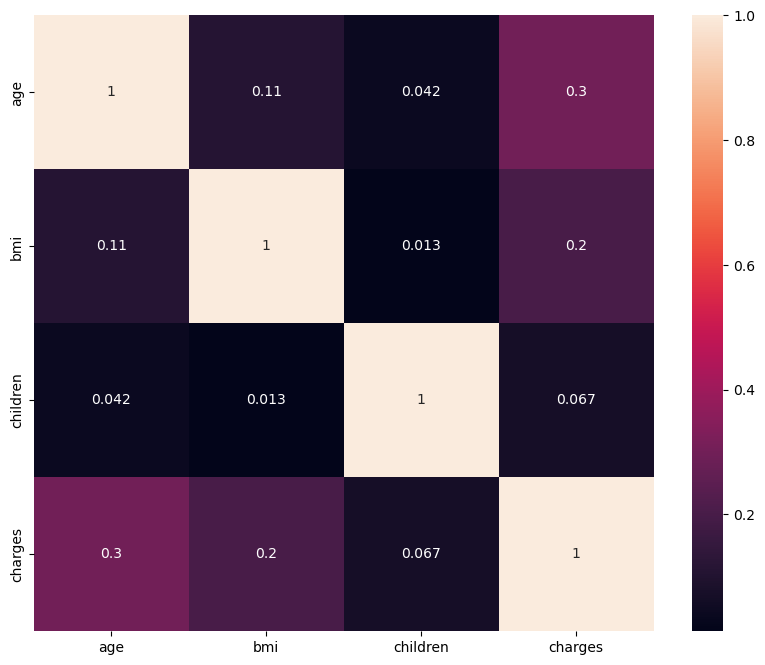

In [83]:
plt.figure(figsize= [10, 8])
sns.heatmap(df.corr(numeric_only= True), annot= True)

### --------- Data Visualization ---------

Text(0.5, 1.0, 'Age Histgram')

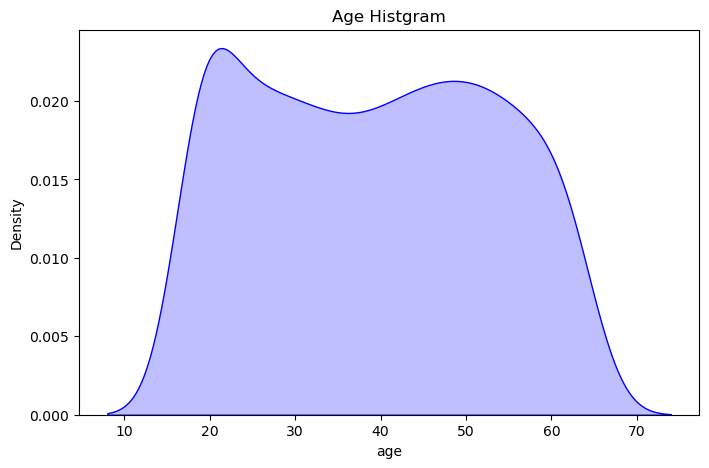

In [84]:
plt.figure(figsize=(8,5))
sns.kdeplot(df.age ,shade =True , color = 'b')
plt.title('Age Histgram' )

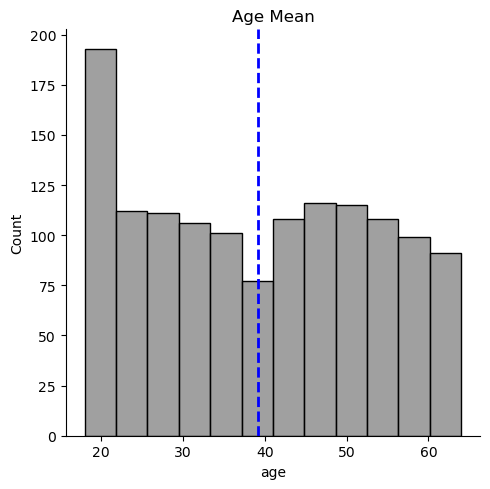

Age Mean is :  39.222139117427076


In [85]:

sns.displot(df['age'] , color = 'gray')
plt.axvline(x = df['age'].mean() , color = "Blue" , linestyle = '--' , linewidth = 2)
plt.title('Age Mean')
plt.tight_layout()
plt.show()
print ('Age Mean is : ' ,df['age'].mean())

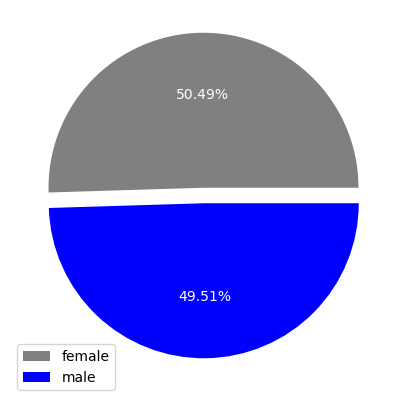

In [86]:
sex = ['female' , 'male']
color = ['gray' , 'blue']
values = df['sex'].value_counts()
plt.figure(figsize=(5,7))
plt.pie(values , labels=sex , colors = color , explode = (0.1 , 0 ) , textprops = {'color' : 'w'} , autopct = '%.2f%%' )
plt.legend();

In [87]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [88]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


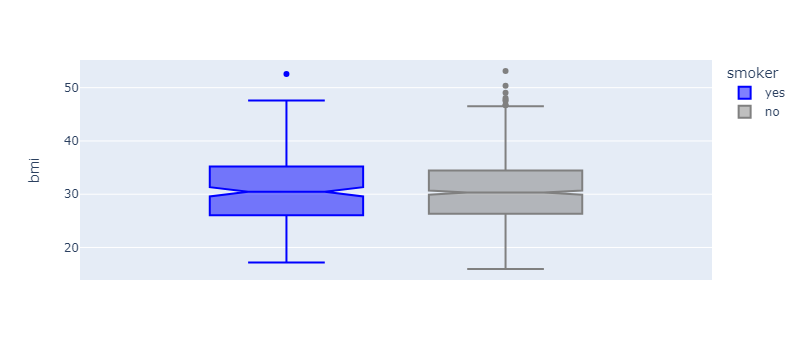

In [89]:
color = ['blue' , 'gray']
fig = px.box(data_frame=df ,  y = 'bmi' , color = 'smoker' , notched= True , color_discrete_sequence=color )
fig.show()

<Axes: xlabel='children', ylabel='Count'>

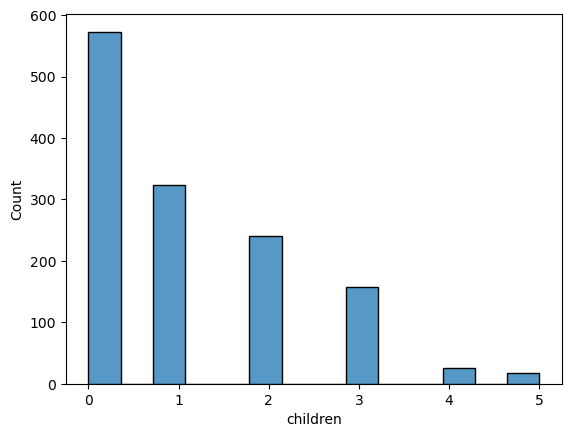

In [90]:
sns.histplot(df , x = df['children'])

<Axes: xlabel='smoker', ylabel='count'>

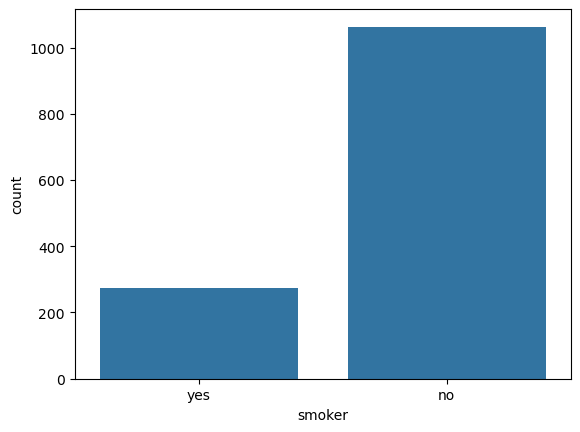

In [91]:
sns.countplot(df ,  x=df['smoker'])

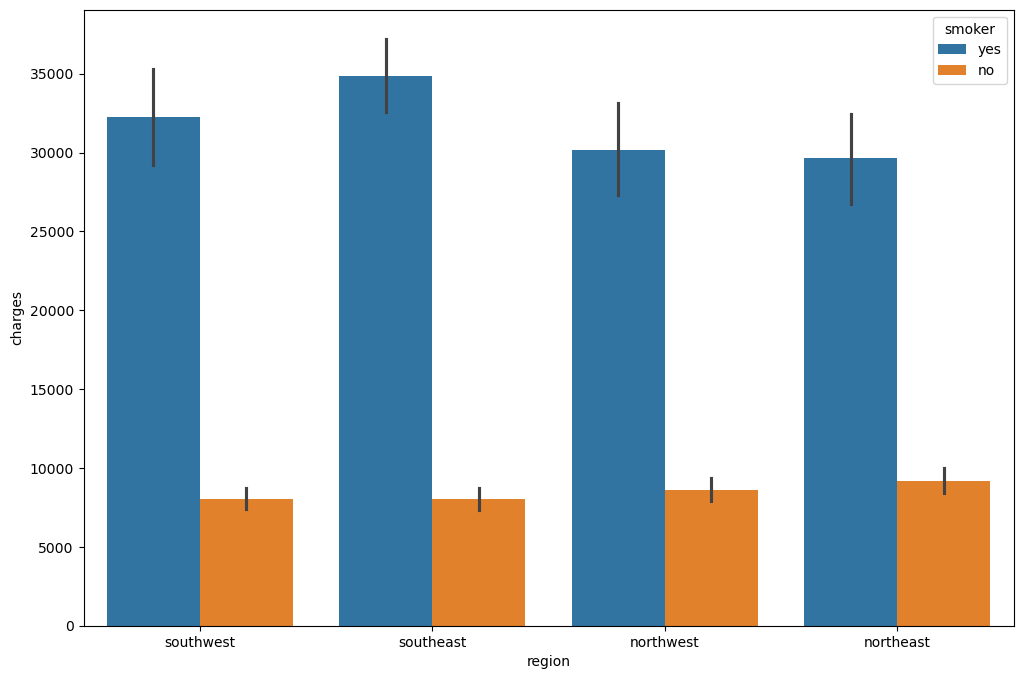

In [92]:
color = ['gray' , 'blue']
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df)

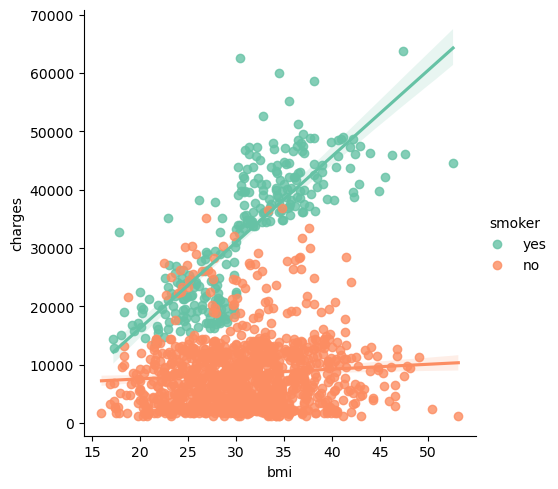

In [93]:
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')

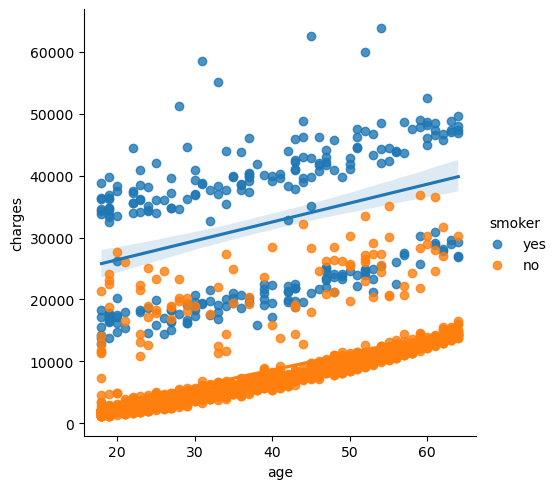

In [94]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')


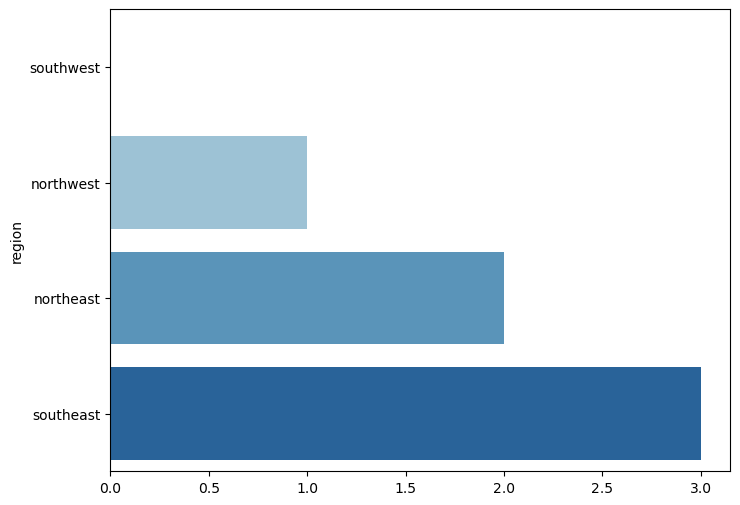

In [95]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending = True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
ax = sns.barplot(charges.head().index, palette='Blues')

In [96]:
df[['charges' , 'bmi']].corr()

,charges,bmi
charges,1.000000,0.198401
bmi,0.198401,1.000000


<Axes: xlabel='bmi', ylabel='charges'>

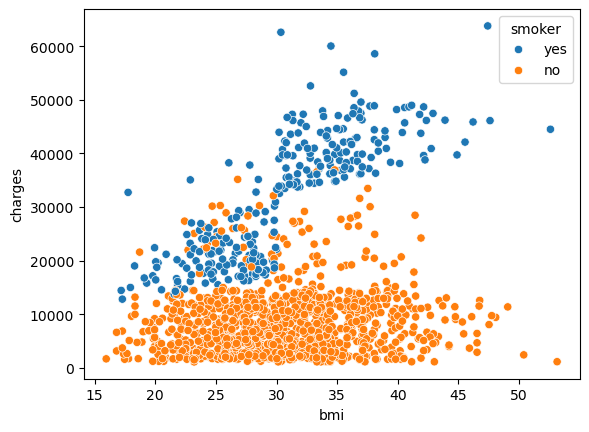

In [97]:
sns.scatterplot(df , x = df['bmi'], y = df['charges'] , hue=df['smoker'] )

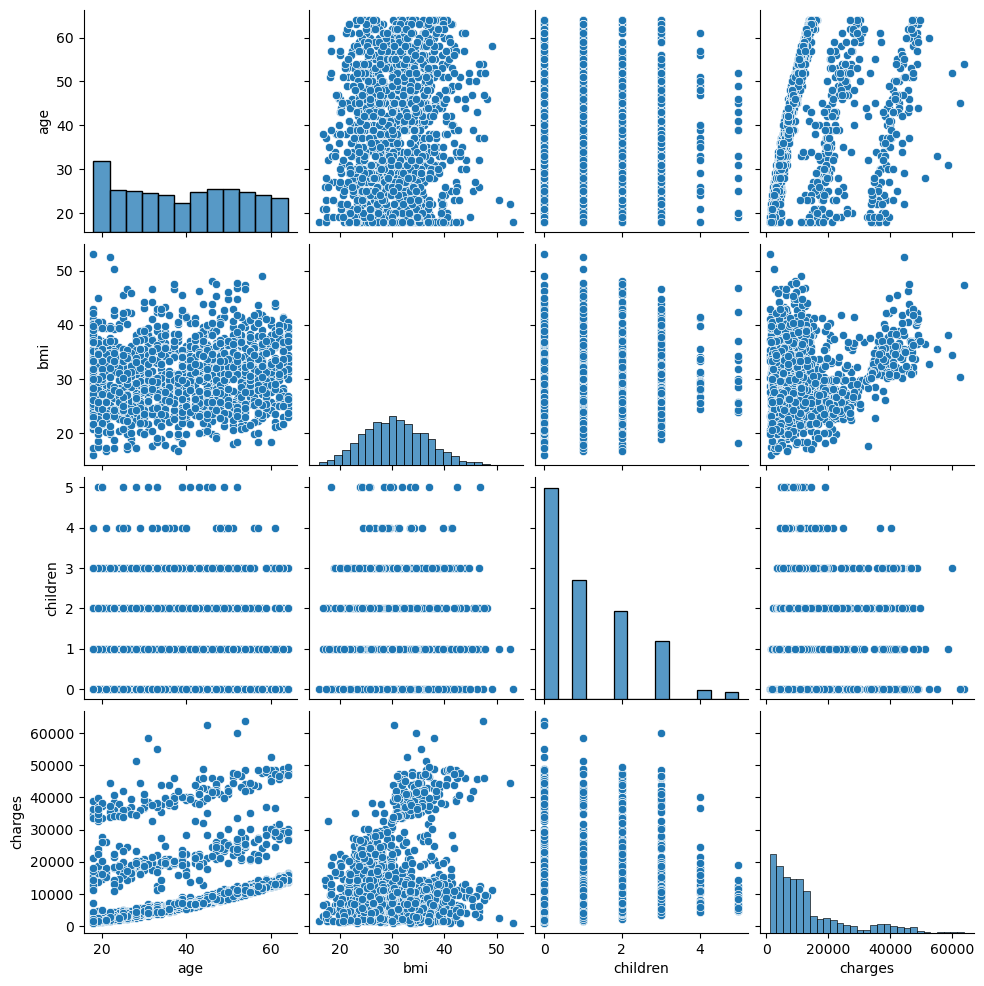

In [98]:
sns.pairplot(df.select_dtypes('number') )

## ---- Hendell Outliears ----

### --- Outliers in column (bmi) 

In [99]:
df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1337, dtype: float64

In [100]:
Outliers_bmi = df[df['bmi']>= 46.75] 

In [101]:
Ind_Outliers_bmi = Outliers_bmi.index

In [102]:
df.drop(Ind_Outliers_bmi , axis = 0 , inplace = True)

In [103]:
df.reset_index(drop= True, inplace= True)

### --- Outliers in column (charges) Use log1p

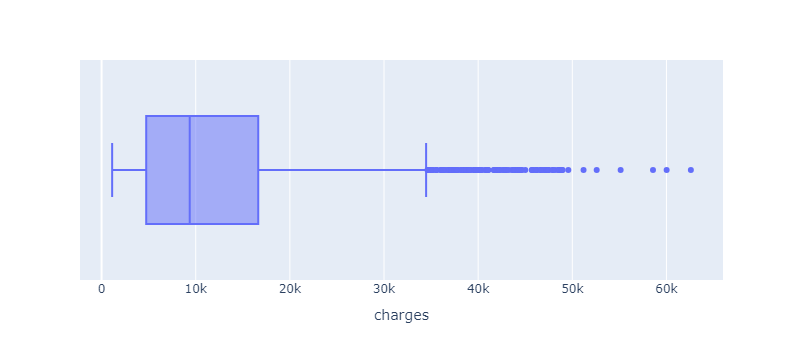

In [104]:
px.box(data_frame=df , x = 'charges')

In [105]:
df['charges'] = np.log1p(df['charges']) 

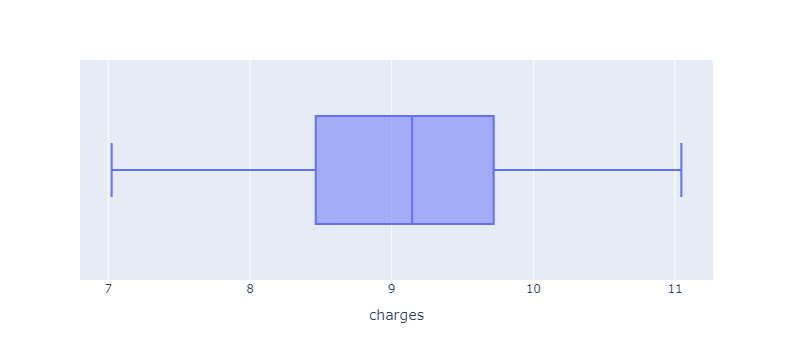

In [106]:
px.box(data_frame=df , x = 'charges')

### ---------- Data Pre_precessing --------------

In [121]:
from sklearn.preprocessing   import OneHotEncoder  , PolynomialFeatures , LabelEncoder
from sklearn.preprocessing   import StandardScaler , MinMaxScaler , RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression 
from sklearn.naive_bayes     import GaussianNB 
from sklearn.linear_model    import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score , recall_score , precision_score , confusion_matrix , ConfusionMatrixDisplay , classification_report

### 1 - ----Encoder -------

In [108]:
for col in df.select_dtypes(include= 'object').columns:
    print (f'{col}  nunique is : {df[col].nunique()}')
    print('-'*22)

sex  nunique is : 2
----------------------
smoker  nunique is : 2
----------------------
region  nunique is : 4
----------------------


In [109]:
ohe_col = ['sex' , 'region' ]
be_col = ['smoker']

### --- OneHotEncoder ---

In [110]:
ohe = OneHotEncoder(sparse_output=False , drop = 'first')

df_ohe = pd.DataFrame(data = ohe.fit_transform(df[ohe_col]) , columns=ohe.get_feature_names_out())

df = pd.concat([df , df_ohe] , axis = 1 )

### --- LabelEncoder ---

In [111]:
be = LabelEncoder()

df['smoker'] = be.fit_transform(df[['smoker']])


In [114]:
df.drop(ohe_col , axis= 1 ,inplace= True)

In [115]:
df

,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,9.734236,0.0,0.0,0.0,1.0
1,18,33.770,1,0,7.453882,1.0,0.0,1.0,0.0
2,28,33.000,3,0,8.400763,1.0,0.0,1.0,0.0
3,33,22.705,0,0,9.998137,1.0,1.0,0.0,0.0
4,32,28.880,0,0,8.260455,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1322,50,30.970,3,0,9.268755,1.0,1.0,0.0,0.0
1323,18,31.920,0,0,7.699381,0.0,0.0,0.0,0.0
1324,18,36.850,0,0,7.396847,0.0,0.0,1.0,0.0
1325,21,25.800,0,0,7.605365,0.0,0.0,0.0,1.0


### 2- Split data into input features and target variable¶

In [117]:
x , y = df.drop(['smoker'] , axis = 1 ) , df['smoker']

In [118]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 , stratify=y)

### 3- ----- StandardScaler (Normalization)

In [119]:
sclr = StandardScaler()
x_train[x_train.columns] = sclr.fit_transform(x_train)
x_test[x_test.columns] = sclr.transform(x_test)


### 4- ------ PolynomialFeatures

In [120]:
poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

### 5- -------- Stape Modeling 

In [122]:
models = [
    ('lr' , LogisticRegression()),
    ('knnc' , KNeighborsClassifier()),
    ('GNBC' , GaussianNB()),
    ('SVC' , SVC()),
    ('DT' , DecisionTreeClassifier()),
    ('RFC' , RandomForestClassifier()),
    ('ADB' , AdaBoostClassifier()),
    ('GB' , GradientBoostingClassifier()),
    ('XGB' , XGBClassifier())
]

In [150]:
for model in models :
    
    model[1].fit(x_train , y_train)
    
    
    y_train_prd = model[1].predict(x_train)
    y_test_prd = model[1].predict(x_test)
    
    print(model[0])
    print('Train acc : ' , accuracy_score(y_train , y_train_prd))
    print('Test acc :' , accuracy_score(y_test , y_test_prd))
    
    print('-'*40)

lr
Train acc :  0.9651272384542884
Test acc : 0.9699248120300752
----------------------------------------
knnc
Train acc :  0.946277097078228
Test acc : 0.9097744360902256
----------------------------------------
GNBC
Train acc :  0.9161168708765316
Test acc : 0.8872180451127819
----------------------------------------
SVC
Train acc :  0.9557021677662583
Test acc : 0.9360902255639098
----------------------------------------
DT
Train acc :  1.0
Test acc : 0.9511278195488722
----------------------------------------
RFC
Train acc :  1.0
Test acc : 0.9548872180451128
----------------------------------------
ADB
Train acc :  0.9830348727615457
Test acc : 0.9548872180451128
----------------------------------------
GB
Train acc :  0.9971724787935909
Test acc : 0.9661654135338346
----------------------------------------
XGB
Train acc :  1.0
Test acc : 0.9624060150375939
----------------------------------------


In [141]:
def Modeling(model , x_train , x_test , y_train , y_test ):
    
    
    
    model.fit(x_train , y_train)
    
    
    y_train_prd = model.predict(x_train)
    y_test_prd = model.predict(x_test)
    
    print(model)
    print('Train')
    print(classification_report(y_train , y_train_prd))
    ConfusionMatrixDisplay(confusion_matrix(y_train , y_train_prd) ).plot()
    print('*'*40)
    
    print('Test')
    print(classification_report(y_test , y_test_prd))    
    ConfusionMatrixDisplay(confusion_matrix(y_test , y_test_prd)).plot() 


LogisticRegression()
Train
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       844
           1       0.85      1.00      0.92       217

    accuracy                           0.97      1061
   macro avg       0.93      0.98      0.95      1061
weighted avg       0.97      0.97      0.97      1061

****************************************
Test
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       212
           1       0.87      1.00      0.93        54

    accuracy                           0.97       266
   macro avg       0.94      0.98      0.96       266
weighted avg       0.97      0.97      0.97       266



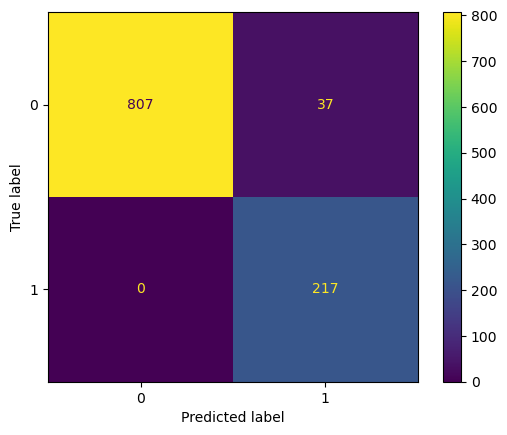

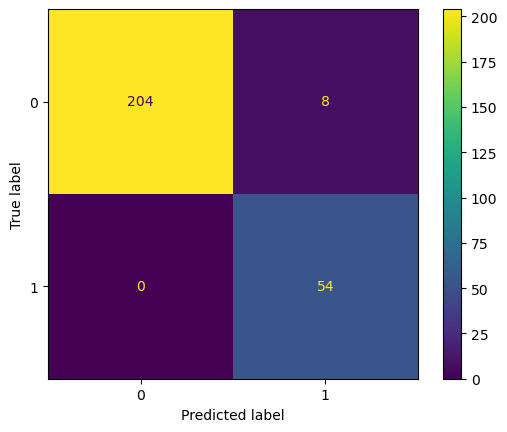

In [142]:
Modeling(LogisticRegression() , x_train , x_test , y_train , y_test)

LogisticRegression(C=10, max_iter=5000)
Train
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       844
           1       0.97      0.97      0.97       217

    accuracy                           0.99      1061
   macro avg       0.98      0.98      0.98      1061
weighted avg       0.99      0.99      0.99      1061

****************************************
Test
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       212
           1       0.80      0.76      0.78        54

    accuracy                           0.91       266
   macro avg       0.87      0.86      0.86       266
weighted avg       0.91      0.91      0.91       266



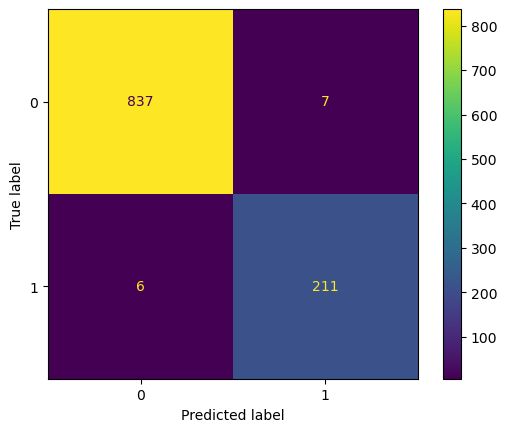

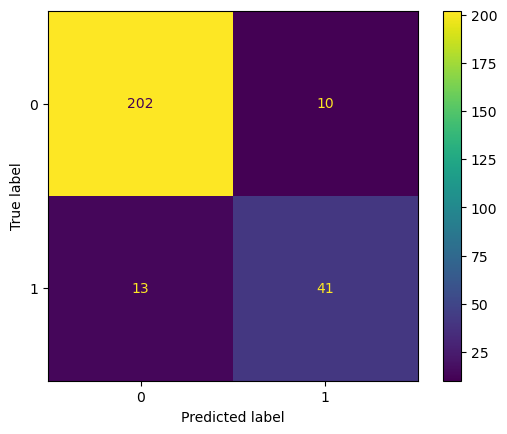

In [143]:
Modeling(LogisticRegression(max_iter=5000 , C = 10 ) , x_train_poly , x_test_poly , y_train , y_test)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=50,
                       min_samples_split=100)
Train
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       844
           1       0.89      0.95      0.92       217

    accuracy                           0.97      1061
   macro avg       0.94      0.96      0.95      1061
weighted avg       0.97      0.97      0.97      1061

****************************************
Test
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       212
           1       0.88      0.94      0.91        54

    accuracy                           0.96       266
   macro avg       0.93      0.96      0.94       266
weighted avg       0.96      0.96      0.96       266



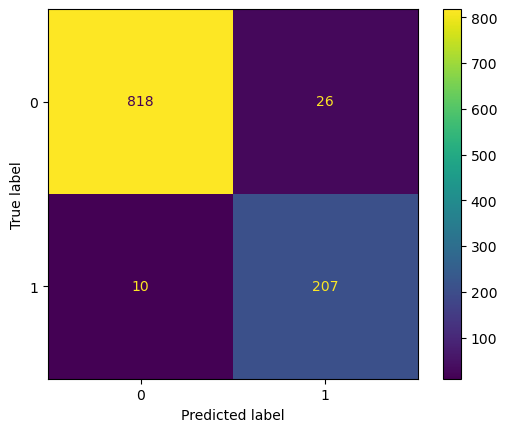

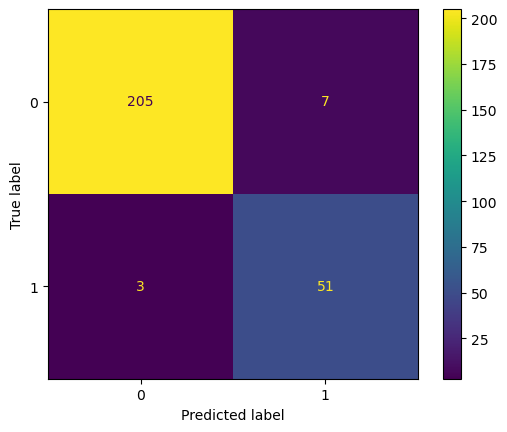

In [144]:
Modeling(DecisionTreeClassifier(max_depth=15 , criterion='entropy' ,
                                min_samples_split= 100 , min_samples_leaf=50) ,
         x_train , x_test , y_train , y_test)

RandomForestClassifier(max_depth=10)
Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       844
           1       1.00      1.00      1.00       217

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061

****************************************
Test
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       212
           1       0.85      0.96      0.90        54

    accuracy                           0.96       266
   macro avg       0.92      0.96      0.94       266
weighted avg       0.96      0.96      0.96       266



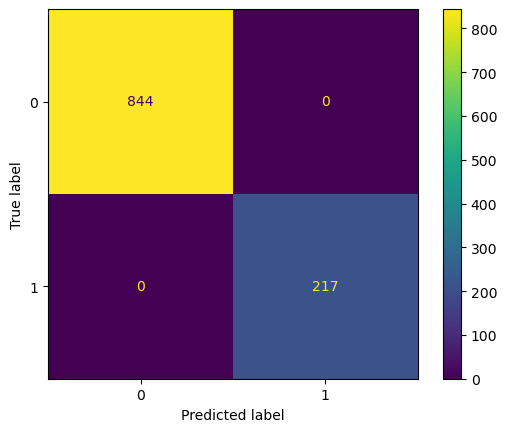

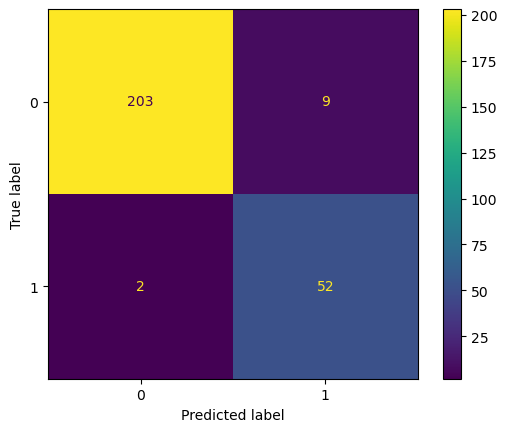

In [145]:
Modeling(RandomForestClassifier(n_estimators=100 ,
                                max_depth=10) ,
         x_train , x_test , y_train , y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Train
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       844
           1       0.98      1.00      0.99       217

    accuracy                           1.00      1061
   macro avg       0

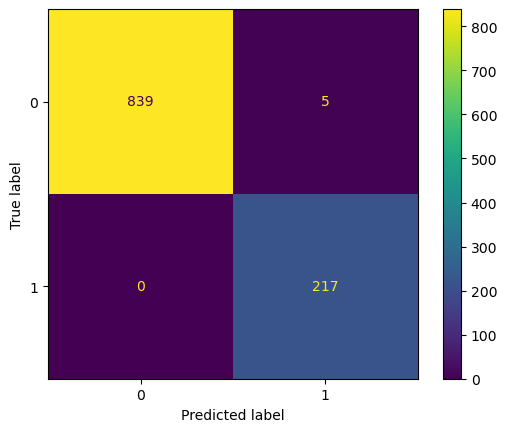

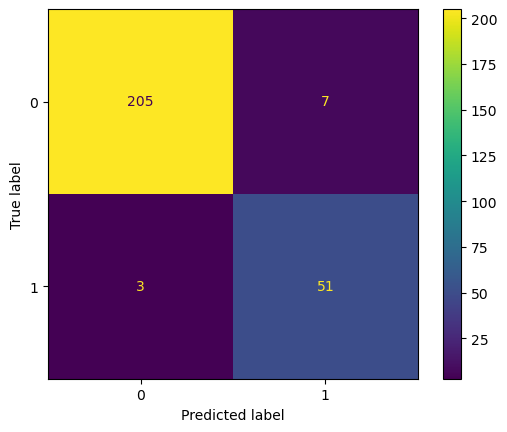

In [146]:
Modeling(XGBClassifier(n_estimators = 20) , x_train , x_test , y_train , y_test)

In [147]:
model = DecisionTreeClassifier(max_depth=5 , criterion='entropy' ,
                                min_samples_split= 100 , min_samples_leaf=50)

In [148]:
model.fit(x_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=100)

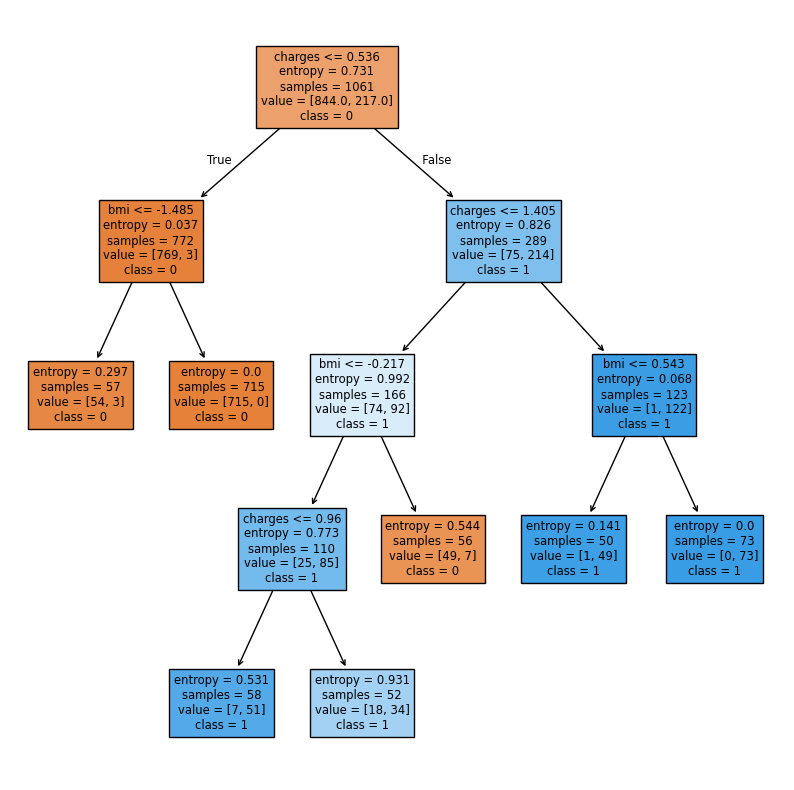

In [149]:
plt.figure(figsize= [10, 10])
plot_tree(model,feature_names= list(model.feature_names_in_),class_names= [str(c) for c in model.classes_],filled= True);